In [1]:
#load dataset
temps <- read.delim("C:/Users/sgede/Datasets for Projects/temps.txt")

In [2]:
#make sure dataset runs
head(temps)

DAY,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,...,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
1-Jul,98,86,91,84,89,84,90,73,82,...,93,95,85,95,87,92,105,82,90,85
2-Jul,97,90,88,82,91,87,90,81,81,...,93,85,87,90,84,94,93,85,93,87
3-Jul,97,93,91,87,93,87,87,87,86,...,93,82,91,89,83,95,99,76,87,79
4-Jul,90,91,91,88,95,84,89,86,88,...,91,86,90,91,85,92,98,77,84,85
5-Jul,89,84,91,90,96,86,93,80,90,...,90,88,88,80,88,90,100,83,86,84
6-Jul,93,84,89,91,96,87,93,84,90,...,81,87,82,87,89,90,98,83,87,84


In [3]:
#remove first column since first column is all strings and make dataset into vector
temps_2 = as.vector(unlist(temps[,-1]))

In [4]:
#make sure first column has been removed
head(temps_2)

[1] 98 97 97 90 89 93

In [5]:
#install packages
install.packages("TTR")
library(TTR)
install.packages("forecast")
library(forecast)
install.packages("caret")
library(caret)


  There is a binary version available but the source version is later:
    binary source needs_compilation
TTR 0.24.2 0.24.3              TRUE

  Binaries will be installed
package 'TTR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sgede\AppData\Local\Temp\RtmpigaqzN\downloaded_packages


Warning message:
"package 'TTR' was built under R version 3.6.3"


  There is a binary version available but the source version is later:
         binary source needs_compilation
forecast   8.14   8.15              TRUE

  Binaries will be installed
package 'forecast' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sgede\AppData\Local\Temp\RtmpigaqzN\downloaded_packages


Warning message:
"package 'forecast' was built under R version 3.6.3"Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



  There is a binary version available but the source version is later:
      binary source needs_compilation
caret 6.0-86 6.0-90              TRUE

  Binaries will be installed
package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\sgede\AppData\Local\Temp\RtmpigaqzN\downloaded_packages


Warning message:
"package 'caret' was built under R version 3.6.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.6.3"Loading required package: ggplot2


In [6]:
set.seed(1)

In [7]:
#make time series data
temps_2.ts <- ts(temps_2, start = 1996, frequency = 123)
head(temps_2.ts)

ERROR while rich displaying an object: Error in if (many_rows) {: argument is of length zero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.ts(obj)
9. repr_ts_gen

In [8]:
#summary statistics
summary(temps_2.ts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  50.00   79.00   85.00   83.34   90.00  105.00 

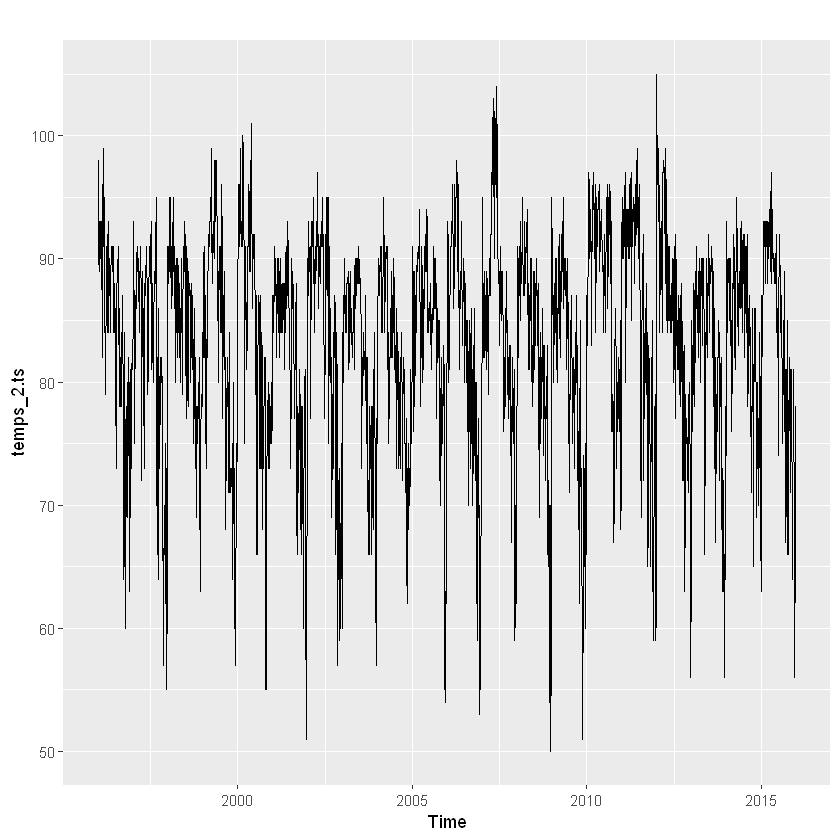

In [9]:
#plot the temps time series
autoplot(temps_2.ts)

In [10]:
# apply Holt Winters method with "additive" seasonality
temps_2.ts_HW_add <- HoltWinters(temps_2.ts, alpha=NULL, beta=NULL, gamma=NULL, seasonal = "additive")

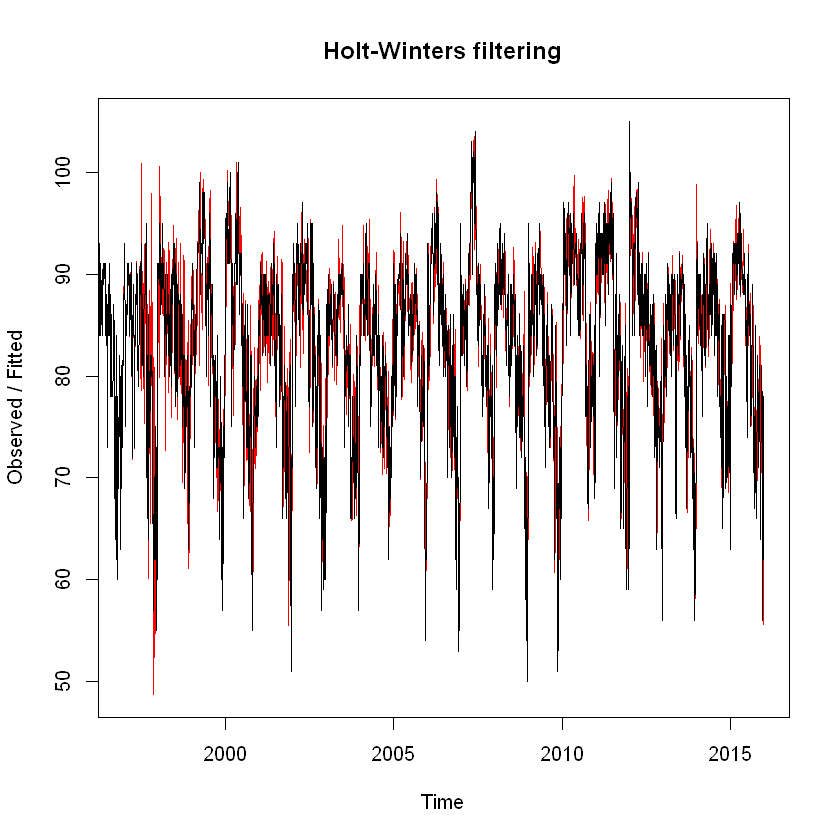

In [11]:
#plot Holt Winters additive
plot(temps_2.ts_HW_add)

In [12]:
head(temps_2.ts_HW_add$fitted)

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,xhat,level,trend,season
1997.000,87.17619,82.87739,-0.004362918,4.303159
1997.008,90.32925,82.09550,-0.004362918,8.238119
1997.016,92.96089,81.87348,-0.004362918,11.091777
1997.024,90.93360,81.89497,-0.004362918,9.042997
1997.033,83.99752,81.93450,-0.004362918,2.067387
1997.041,84.04358,81.93177,-0.004362918,2.116168


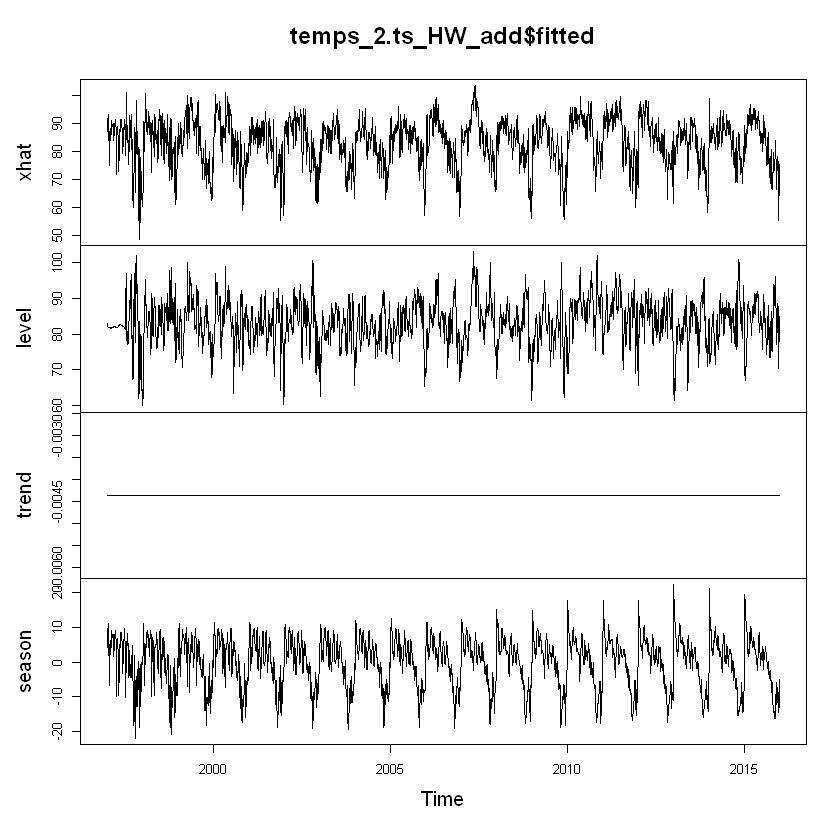

In [13]:
#plot fitted Holt-Winters additive model
plot(temps_2.ts_HW_add$fitted)

In [14]:
# apply Holt Winters method with "multiplicative" seasonality
temps_2.ts_HW_mult <- HoltWinters(temps_2.ts, alpha=NULL, beta=NULL, gamma=NULL, seasonal = "multiplicative")

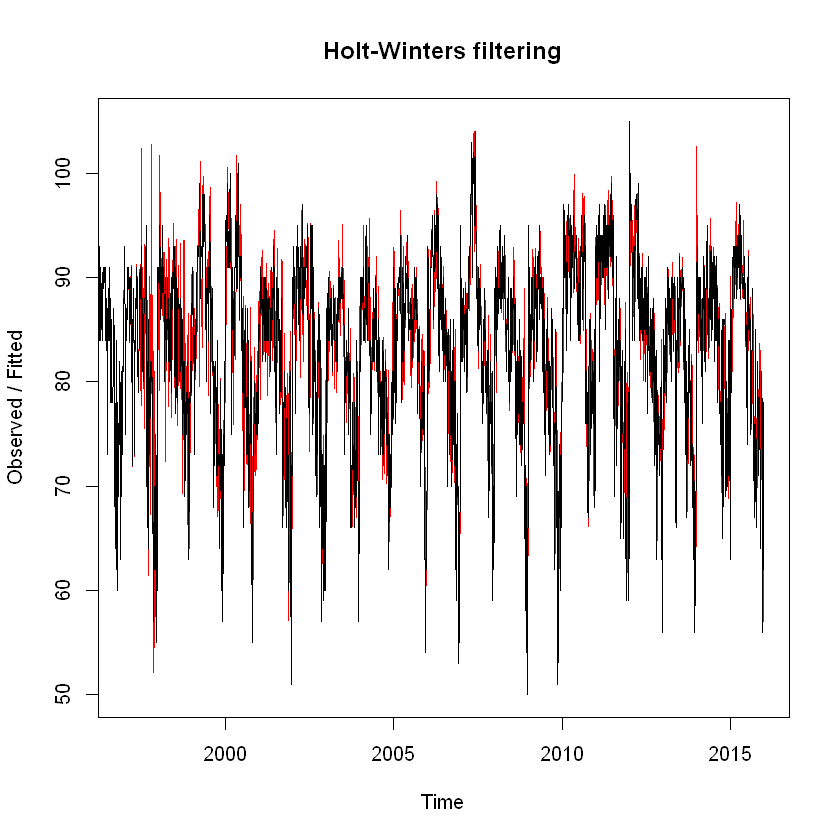

In [15]:
#plot Holt Winters multiplicative
plot(temps_2.ts_HW_mult)

In [16]:
head(temps_2.ts_HW_mult$fitted)

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,xhat,level,trend,season
1997.000,87.23653,82.87739,-0.004362918,1.052653
1997.008,90.42182,82.15059,-0.004362918,1.100742
1997.016,92.99734,81.91055,-0.004362918,1.135413
1997.024,90.94030,81.90763,-0.004362918,1.110338
1997.033,83.99917,81.93634,-0.004362918,1.025231
1997.041,84.04496,81.93247,-0.004362918,1.025838


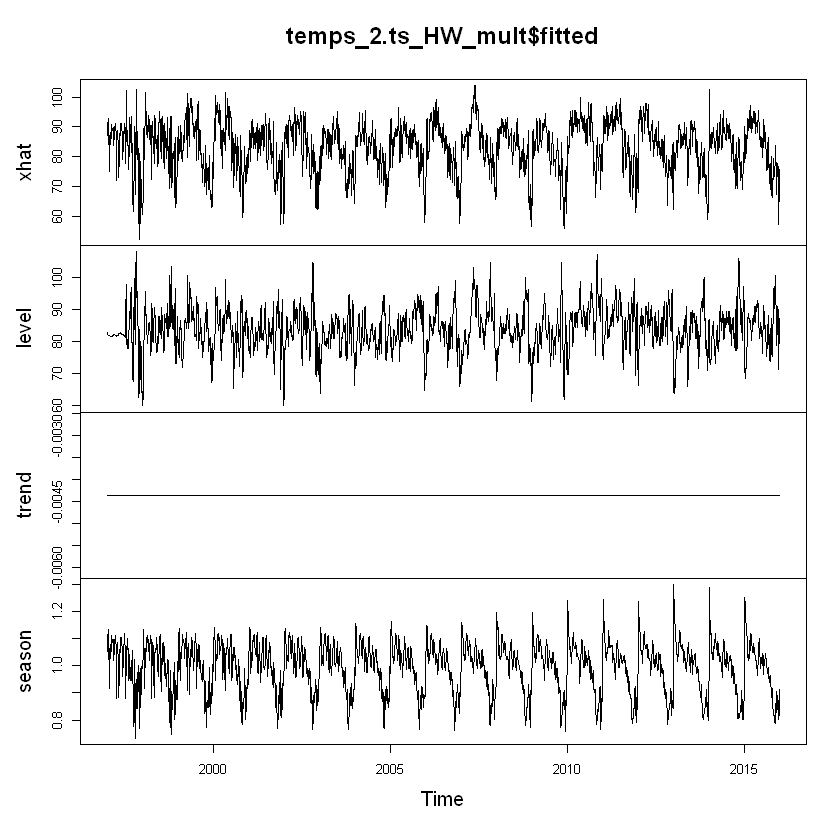

In [17]:
#plot fitted Holt-Winters multiplicative model
plot(temps_2.ts_HW_mult$fitted)

In [18]:
"There is progress in smoothing."

[1] "There is progress in smoothing."

In [19]:
# the additive model has lower sum of squares so I will use that model for further investigation
cat("Holt-Winters additive model Sum of Squared Errors:", temps_2.ts_HW_add$SSE)
cat("\nHolt-Winters multiplicative model Sum of Squared Errors:", temps_2.ts_HW_mult$SSE)

Holt-Winters additive model Sum of Squared Errors: 66244.25
Holt-Winters multiplicative model Sum of Squared Errors: 68904.57

In [20]:
# run cumsum on fitted data

In [21]:
a_season <- matrix(temps_2.ts_HW_add$fitted[,4],ncol=123)

In [22]:
head(a_season)

4.303159,7.896655,-2.493588,8.132428,3.4251107,-12.192775,-12.6480600,2.284850,6.239628,6.6517207,...,1.8817396,2.7973275,-7.384007,-6.731199,4.594863,4.229417,2.351232,1.784854,-4.558808,-14.105770
8.238119,6.766574,-9.574889,8.343810,-0.5748893,-16.176515,-8.5667592,6.318137,-9.901430,6.6256258,...,1.1980662,2.5782433,-4.781048,-10.324733,2.398748,7.180348,6.424048,1.580458,-3.088859,-16.322937
11.091777,1.677143,-2.656190,9.490151,-0.5179787,-18.135865,-8.4935885,4.338100,-1.984170,5.6101678,...,-0.2425926,0.3037505,-6.456080,-11.314989,4.734543,4.587807,7.136208,1.309686,-2.716105,-16.169481
9.042997,4.766574,3.238119,9.620233,-4.4691982,-22.103345,-6.4935885,8.285123,1.990683,-0.3353284,...,2.9354693,-2.8434214,-7.796781,-14.441652,2.474585,5.996550,8.335971,0.883261,-2.276560,-12.230328
2.067387,5.799094,5.156818,2.770639,-3.4122877,-4.046434,-6.4854584,9.225205,6.040869,-3.2044010,...,0.9624345,-1.7724418,-13.752436,-9.707349,3.562329,6.522292,8.632628,1.957987,-4.599660,-9.335535
2.116168,6.815355,5.099907,-3.152125,-3.3391169,-12.013914,-0.5342389,9.200351,6.997307,-1.1412182,...,5.2063254,0.2441455,-15.460074,-10.375104,1.729221,5.832260,7.564373,3.625247,-5.251089,-10.575347


In [23]:
dim(a_season)

[1]  19 123

In [24]:
#put row names and column names back into dataset to make easier to use
colnames(a_season)<-as.vector(t(temps[,1]))
rownames(a_season)<-c(1997:2015)

In [25]:
#check to make sure row names and column names added
head(a_season)

,1-Jul,2-Jul,3-Jul,4-Jul,5-Jul,6-Jul,7-Jul,8-Jul,9-Jul,10-Jul,...,22-Oct,23-Oct,24-Oct,25-Oct,26-Oct,27-Oct,28-Oct,29-Oct,30-Oct,31-Oct
1997,4.303159,7.896655,-2.493588,8.132428,3.4251107,-12.192775,-12.6480600,2.284850,6.239628,6.6517207,...,1.8817396,2.7973275,-7.384007,-6.731199,4.594863,4.229417,2.351232,1.784854,-4.558808,-14.105770
1998,8.238119,6.766574,-9.574889,8.343810,-0.5748893,-16.176515,-8.5667592,6.318137,-9.901430,6.6256258,...,1.1980662,2.5782433,-4.781048,-10.324733,2.398748,7.180348,6.424048,1.580458,-3.088859,-16.322937
1999,11.091777,1.677143,-2.656190,9.490151,-0.5179787,-18.135865,-8.4935885,4.338100,-1.984170,5.6101678,...,-0.2425926,0.3037505,-6.456080,-11.314989,4.734543,4.587807,7.136208,1.309686,-2.716105,-16.169481
2000,9.042997,4.766574,3.238119,9.620233,-4.4691982,-22.103345,-6.4935885,8.285123,1.990683,-0.3353284,...,2.9354693,-2.8434214,-7.796781,-14.441652,2.474585,5.996550,8.335971,0.883261,-2.276560,-12.230328
2001,2.067387,5.799094,5.156818,2.770639,-3.4122877,-4.046434,-6.4854584,9.225205,6.040869,-3.2044010,...,0.9624345,-1.7724418,-13.752436,-9.707349,3.562329,6.522292,8.632628,1.957987,-4.599660,-9.335535
2002,2.116168,6.815355,5.099907,-3.152125,-3.3391169,-12.013914,-0.5342389,9.200351,6.997307,-1.1412182,...,5.2063254,0.2441455,-15.460074,-10.375104,1.729221,5.832260,7.564373,3.625247,-5.251089,-10.575347


In [26]:
#transpose xhat 
a_season <- t(a_season)

In [27]:
#make a dataframe to store cumsum values
cumsum_dataframe <- data.frame(matrix(nrow=nrow(a_season),ncol=ncol(a_season)))
#assign column names to dataframe
colnames(cumsum_dataframe)<-colnames(a_season)
rownames(cumsum_dataframe)<-rownames(a_season)

In [28]:
#calculate cumsum values for each year
for(y in 2:ncol(cumsum_dataframe)){
    cumsum_dataframe[1,y]<-0 #set intial St to zero for each column
    july_mu <- mean(a_season[1:31,y-1]) #the expected value for month of july if no change
    july_sd <- sd(a_season[1:31,y-1]) #the standard deviation for month of july
    threshold <- 5*july_sd #typical value of threshold is 5 times standard deviation 
    change <- NULL #for storing dates with St over threshold
    for(i in 2:nrow(cumsum_dataframe)){
        cumsum_dataframe[i,y] <- max(0,cumsum_dataframe[i-1,y]+(july_mu-a_season[i,y]-july_sd))
        if (cumsum_dataframe[i,y]>=threshold){
            change <- append(change,cumsum_dataframe[i,y])}}
    if (length(change)==0){
        cat("Year",colnames(cumsum_dataframe[y]),":no change detection.\n")
    }else{
        cat("In year ",colnames(cumsum_dataframe[y]),"The date summer begins:",
        cumsum_dataframe[which(cumsum_dataframe[,y]==change[1]),"Day"],"\n")}
    
}

Year 1998 :no change detection.
Year 1999 :no change detection.
Year 2000 :no change detection.
Year 2001 :no change detection.
Year 2002 :no change detection.
Year 2003 :no change detection.
Year 2004 :no change detection.
Year 2005 :no change detection.
Year 2006 :no change detection.
Year 2007 :no change detection.
Year 2008 :no change detection.
Year 2009 :no change detection.
Year 2010 :no change detection.
Year 2011 :no change detection.
Year 2012 :no change detection.
Year 2013 :no change detection.
Year 2014 :no change detection.
Year 2015 :no change detection.


In [29]:
"Results show no change detection indicating the unofficial end of summer has gotten later over the years"

[1] "Results show no change detection indicating the unofficial end of summer has gotten later over the years"